<a href="https://colab.research.google.com/github/sahartriki/DW_Hackqueens/blob/main/emplyee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [19]:
le=LabelEncoder()


# **Loading model**

In [20]:
from google.colab import drive

drive.mount('/content/data')

Drive already mounted at /content/data; to attempt to forcibly remount, call drive.mount("/content/data", force_remount=True).


In [21]:
data_dir='/content/drive/MyDrive/dw'

**Preprocessing**

In [22]:
df= pd.read_csv('/content/data/MyDrive/dw/Turnoveremp.csv')


# **Data observation**

In [23]:
df.head()

,EmployeId,Age,Gender,MaritalStatus,Turnover,Travelling,Vertical,Qualifications,EducationField,EmployeSatisfaction,...,RelationshipSatisfaction,Hours,StockOptionLevel,TrainingTimesLastYear,Work&Life,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,DistanceFromHome
0,63,29,M,Divorced,No,Sometimes,Research & Development,1,Medical,3,...,4,80,1,2,3,3,2,2,2,2
1,723,23,M,Single,No,Mostly,Sales,1,Life Sciences,2,...,4,80,0,3,3,1,0,0,0,6
2,1297,36,M,Single,Yes,Sometimes,Human Resources,4,Life Sciences,2,...,3,80,0,3,4,7,7,0,0,10
3,51,30,M,Divorced,No,Sometimes,Research & Development,4,Medical,3,...,2,80,3,5,3,10,6,3,9,12
4,1498,29,M,Single,Yes,Sometimes,Sales,3,Technical Degree,4,...,1,80,0,2,3,3,2,2,2,24


In [24]:
df.tail()

,EmployeId,Age,Gender,MaritalStatus,Turnover,Travelling,Vertical,Qualifications,EducationField,EmployeSatisfaction,...,RelationshipSatisfaction,Hours,StockOptionLevel,TrainingTimesLastYear,Work&Life,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,DistanceFromHome
1465,702,49,M,Divorced,No,Sometimes,Research & Development,3,Medical,4,...,3,80,2,3,3,7,7,4,6,24
1466,1999,30,F,Married,No,Mostly,Research & Development,3,Life Sciences,4,...,3,80,0,3,3,3,2,1,2,2
1467,1395,21,M,Single,No,Mostly,Research & Development,1,Medical,4,...,3,80,0,5,3,1,4,0,0,2
1468,919,42,M,Married,No,Sometimes,Sales,3,Marketing,4,...,3,80,1,3,2,1,0,0,0,10
1469,97,42,M,Single,No,Mostly,Research & Development,3,Life Sciences,4,...,1,80,0,3,3,8,3,1,0,7


In [25]:
df.shape

(1470, 32)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeId                 1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Gender                    1470 non-null   object
 3   MaritalStatus             1470 non-null   object
 4   Turnover                  1470 non-null   object
 5   Travelling                1470 non-null   object
 6   Vertical                  1470 non-null   object
 7   Qualifications            1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeSatisfaction       1470 non-null   int64 
 10  JobEngagement             1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobSatisfaction           1470 non-null   int64 
 13  Role                      1470 non-null   object
 14  DailyBilling            

In [27]:
# checking for null values
df.isnull().sum()

EmployeId                   0
Age                         0
Gender                      0
MaritalStatus               0
Turnover                    0
Travelling                  0
Vertical                    0
Qualifications              0
EducationField              0
EmployeSatisfaction         0
JobEngagement               0
JobLevel                    0
JobSatisfaction             0
Role                        0
DailyBilling                0
HourBilling                 0
MonthlyBilling              0
MonthlyRate                 0
Work Experience             0
OverTime                    0
PercentSalaryHike           0
Last Rating                 0
RelationshipSatisfaction    0
Hours                       0
StockOptionLevel            0
TrainingTimesLastYear       0
Work&Life                   0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrentManager     0
DistanceFromHome            0
dtype: int64

In [28]:
df.describe()

,EmployeId,Age,Qualifications,EmployeSatisfaction,JobEngagement,JobLevel,JobSatisfaction,DailyBilling,HourBilling,MonthlyBilling,...,RelationshipSatisfaction,Hours,StockOptionLevel,TrainingTimesLastYear,Work&Life,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,DistanceFromHome
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1056.771429,37.065306,2.876190,2.702041,2.712245,2.087075,2.785034,763.046939,65.074830,6752.281633,...,2.727891,80.0,0.817007,2.769388,2.798639,6.772109,4.066667,2.095238,3.945578,9.278231
std,594.598084,9.522562,1.019038,1.095039,0.731141,1.109663,1.095840,426.331994,20.604377,5141.197951,...,1.086822,0.0,0.880070,1.350900,0.714718,5.777745,3.741427,3.261537,3.702486,8.157120
min,8.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,107.000000,30.000000,1102.000000,...,1.000000,80.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,531.250000,30.000000,2.000000,2.000000,2.000000,1.000000,2.000000,403.750000,47.000000,2919.250000,...,2.000000,80.0,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,1.000000,2.000000
50%,1073.000000,36.000000,3.000000,3.000000,3.000000,2.000000,3.000000,704.500000,66.000000,4854.000000,...,3.000000,80.0,1.000000,2.000000,3.000000,5.000000,3.000000,1.000000,2.000000,7.000000
75%,1553.750000,44.000000,4.000000,4.000000,3.000000,3.000000,4.000000,1151.000000,83.000000,8838.500000,...,4.000000,80.0,1.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,15.000000
max,2060.000000,59.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1495.000000,100.000000,19847.000000,...,4.000000,80.0,3.000000,6.000000,4.000000,33.000000,17.000000,15.000000,17.000000,29.000000


In [29]:
df['Turnover'].unique()

array(['No', 'Yes'], dtype=object)

In [30]:
df.groupby('Turnover').count()['EmployeSatisfaction']


Turnover
No     1203
Yes     267
Name: EmployeSatisfaction, dtype: int64

In [31]:
df.groupby('Turnover').mean()

<ipython-input-31-26d995daaafb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Turnover').mean()


,EmployeId,Age,Qualifications,EmployeSatisfaction,JobEngagement,JobLevel,JobSatisfaction,DailyBilling,HourBilling,MonthlyBilling,...,RelationshipSatisfaction,Hours,StockOptionLevel,TrainingTimesLastYear,Work&Life,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,DistanceFromHome
Turnover,,,,,,,,,,,,,,,,,,,,,
No,1057.269327,37.758936,2.883624,2.731505,2.749792,2.179551,2.802993,772.852037,65.309227,7126.622610,...,2.762261,80.0,0.85453,2.758936,2.802161,7.085619,4.344971,2.148795,4.183707,9.019119
Yes,1054.528090,33.940075,2.842697,2.569288,2.543071,1.670412,2.704120,718.868914,64.018727,5065.644195,...,2.573034,80.0,0.64794,2.816479,2.782772,5.359551,2.812734,1.853933,2.872659,10.445693


In [32]:
df['Gender'] = le.fit_transform(df['Gender'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
df['Turnover'] = le.fit_transform(df['Turnover'])
df['Travelling'] = le.fit_transform(df['Travelling'])
df['OverTime'] = le.fit_transform(df['OverTime'])

In [33]:
df_numeric=df.select_dtypes(int)


In [34]:
df_numeric.head()

,EmployeId,Age,Gender,MaritalStatus,Turnover,Travelling,Qualifications,EmployeSatisfaction,JobEngagement,JobLevel,...,RelationshipSatisfaction,Hours,StockOptionLevel,TrainingTimesLastYear,Work&Life,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,DistanceFromHome
0,63,29,1,0,0,2,1,3,3,1,...,4,80,1,2,3,3,2,2,2,2
1,723,23,1,2,0,0,1,2,3,1,...,4,80,0,3,3,1,0,0,0,6
2,1297,36,1,2,1,2,4,2,3,2,...,3,80,0,3,4,7,7,0,0,10
3,51,30,1,0,0,2,4,3,3,3,...,2,80,3,5,3,10,6,3,9,12
4,1498,29,1,2,1,2,3,4,3,1,...,1,80,0,2,3,3,2,2,2,24


# ** Visualisation des données**

<ipython-input-35-0b57653f55db>:27: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = correlation_data.corr()


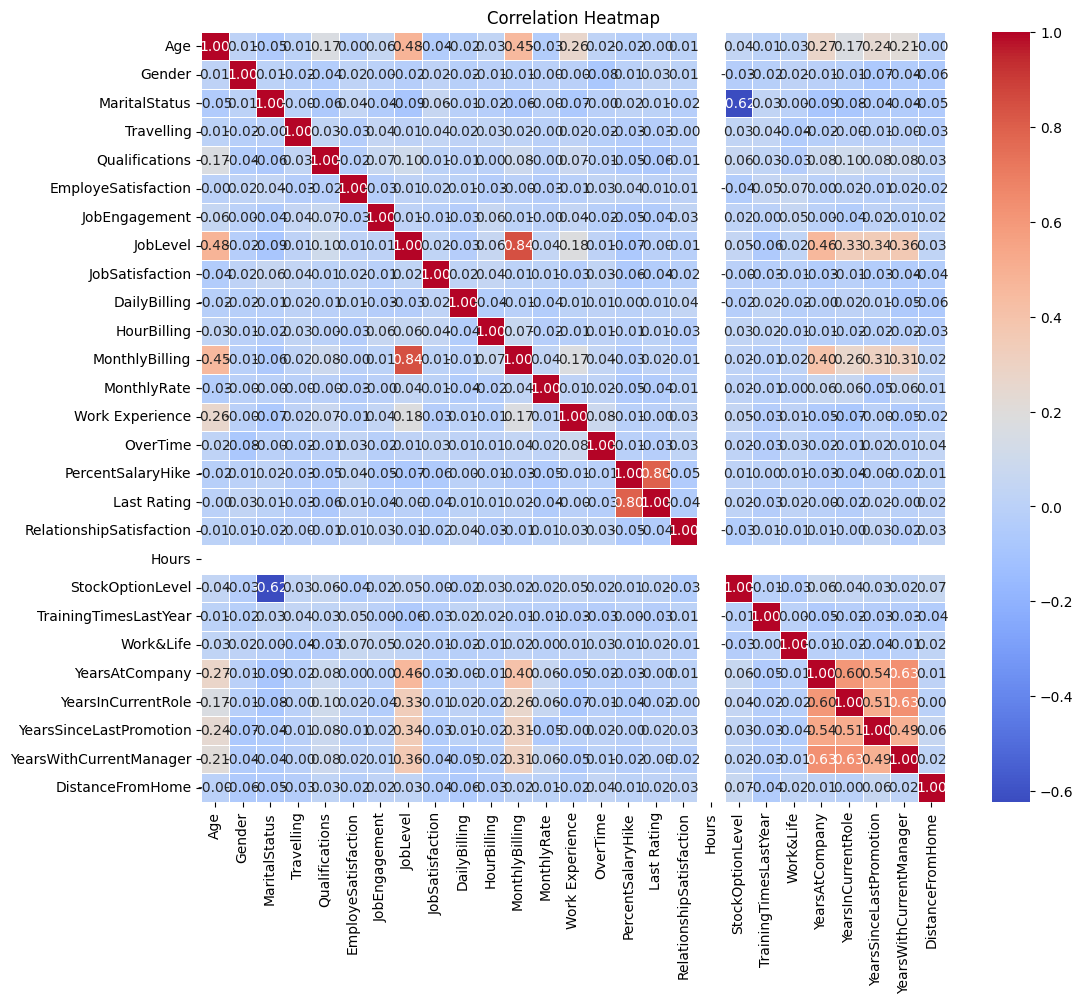

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the provided data
# If not, replace df with the actual DataFrame variable

# Map 'Yes' to 1 and 'No' to 0 in the 'Turnover' column
df['Turnover'] = df['Turnover'].map({'Yes': 1, 'No': 0})

# Select relevant columns for correlation analysis
correlation_columns = [
    'Age', 'Gender', 'MaritalStatus', 'Travelling',
    'Vertical', 'Qualifications', 'EducationField', 'EmployeSatisfaction',
    'JobEngagement', 'JobLevel', 'JobSatisfaction', 'Role', 'DailyBilling',
    'HourBilling', 'MonthlyBilling', 'MonthlyRate', 'Work Experience',
    'OverTime', 'PercentSalaryHike', 'Last Rating', 'RelationshipSatisfaction',
    'Hours', 'StockOptionLevel', 'TrainingTimesLastYear', 'Work&Life',
    'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
    'YearsWithCurrentManager', 'DistanceFromHome'
]

# Create a subset DataFrame with selected columns
correlation_data = df[correlation_columns]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


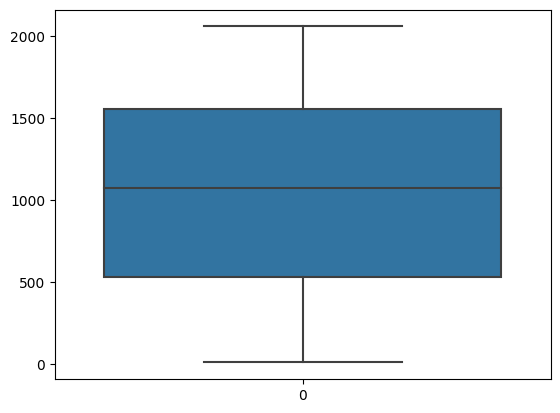

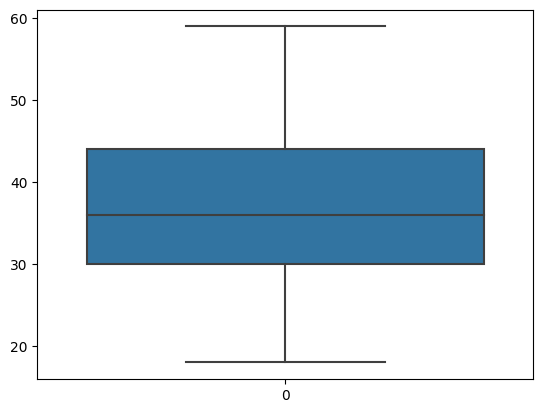

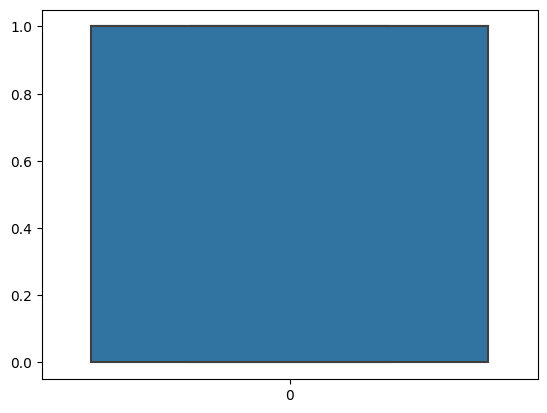

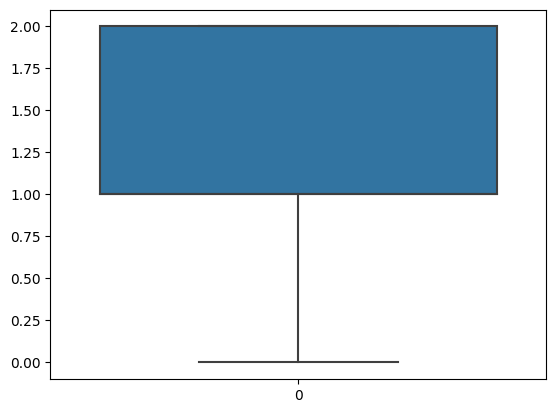

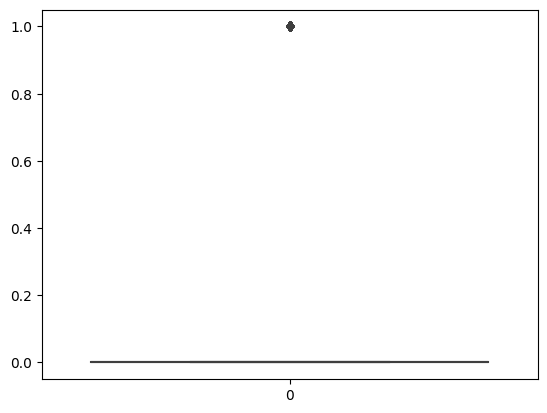

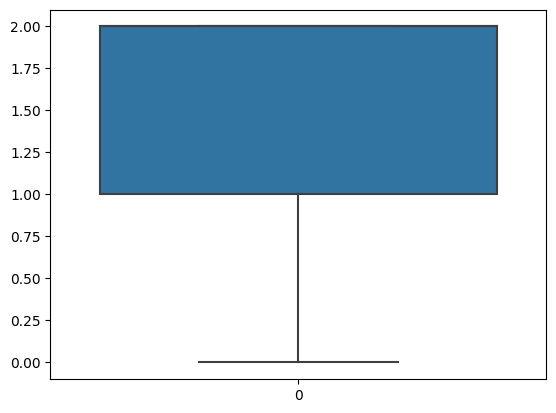

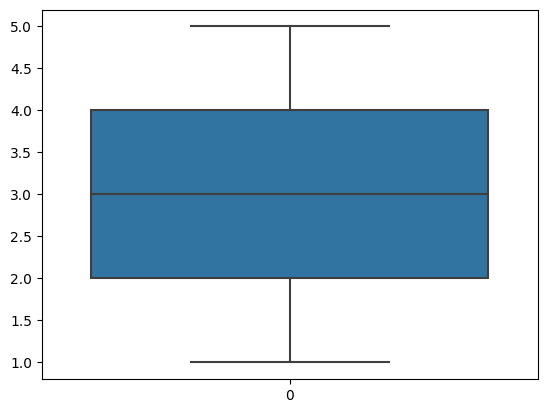

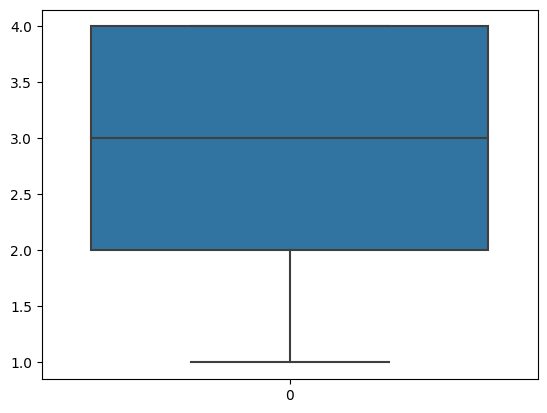

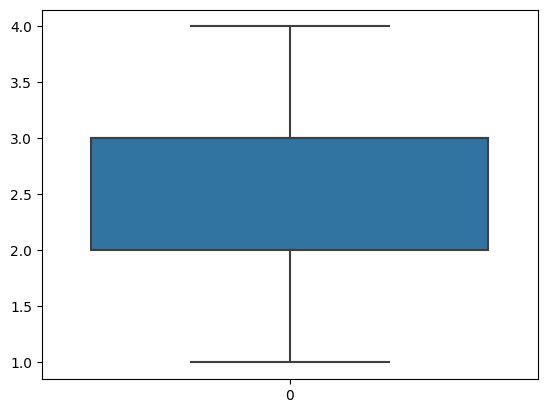

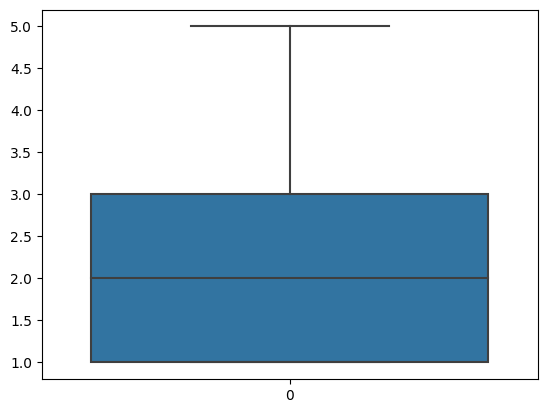

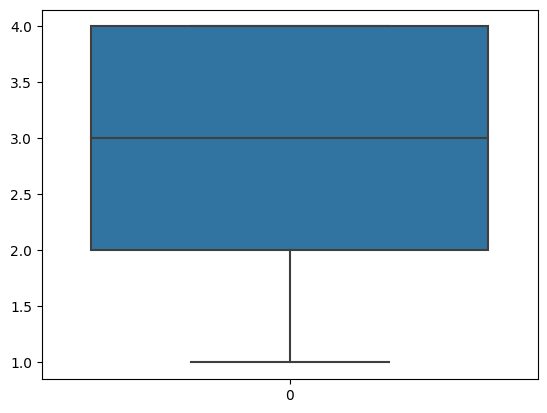

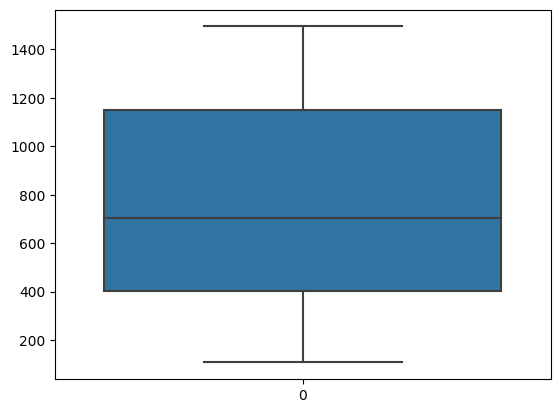

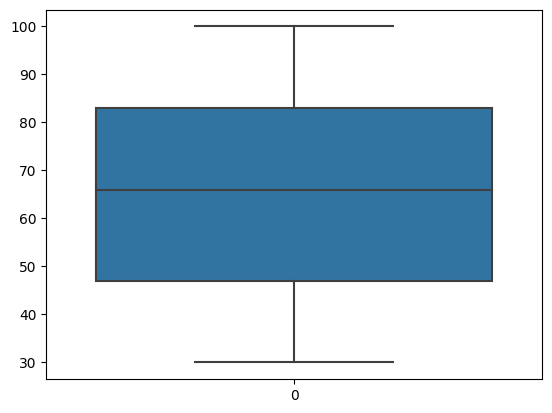

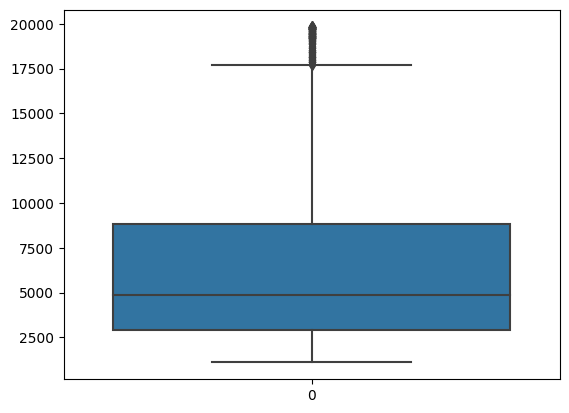

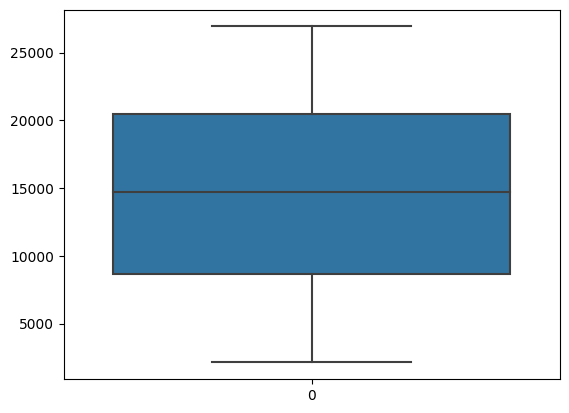

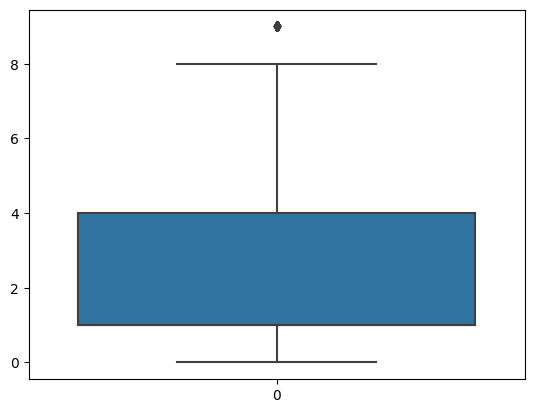

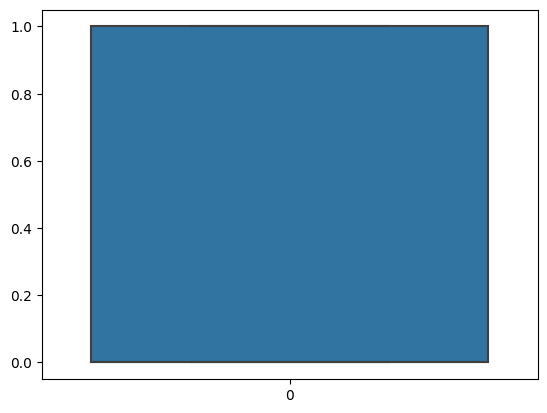

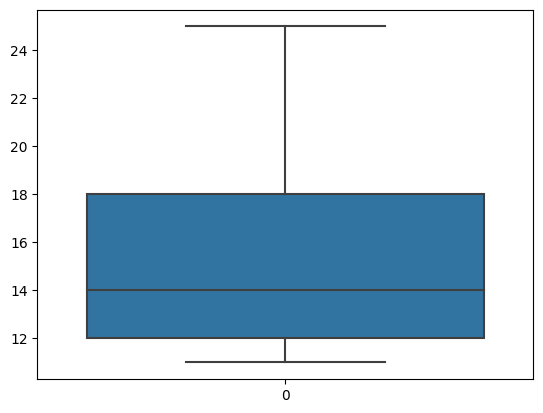

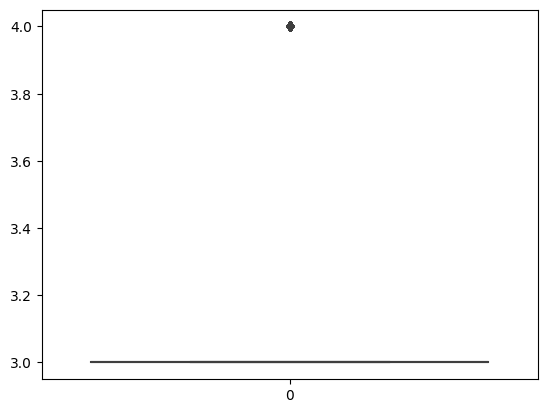

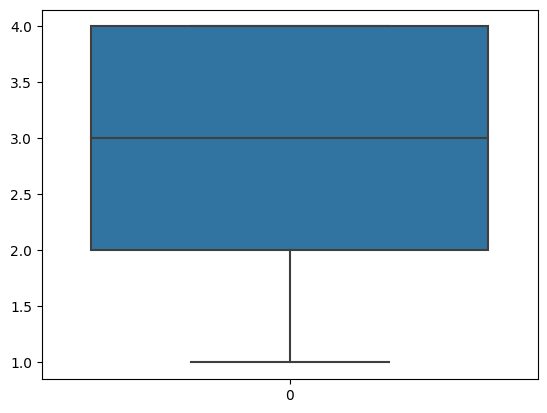

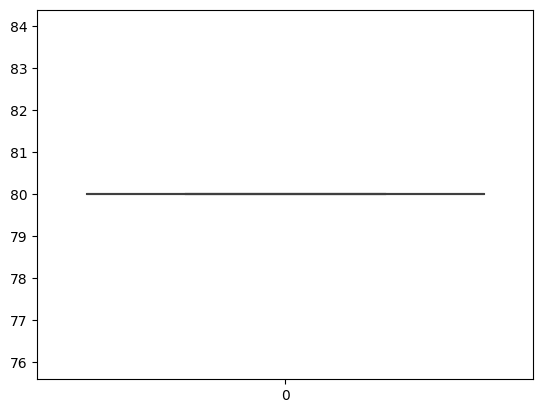

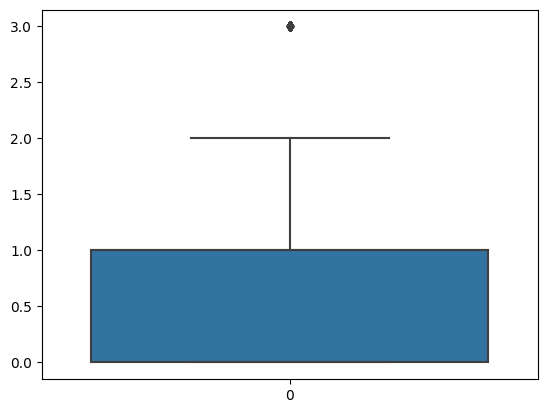

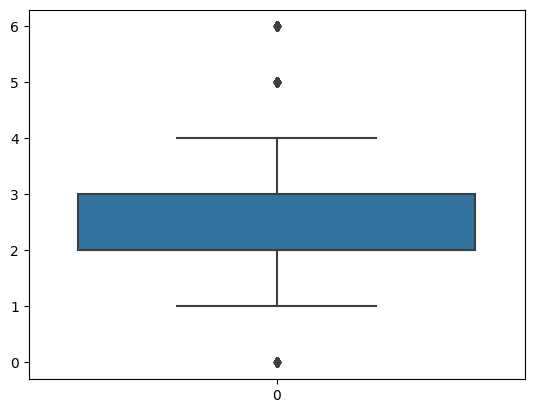

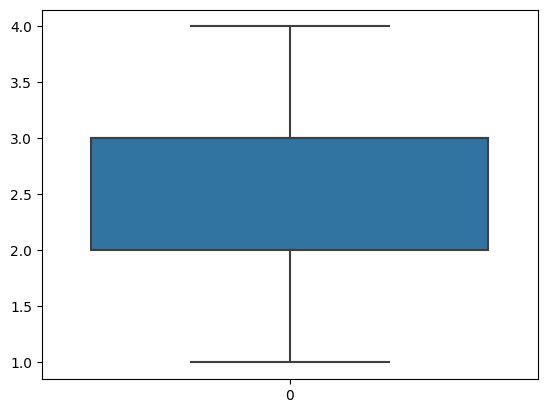

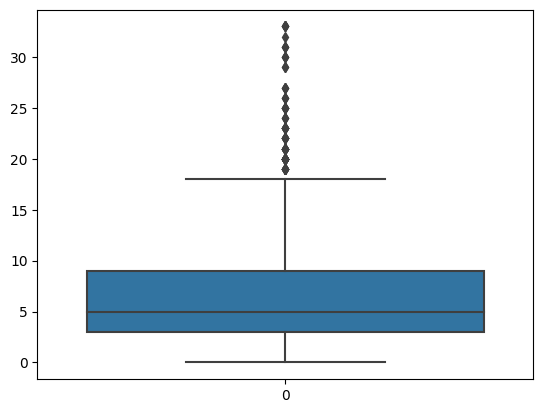

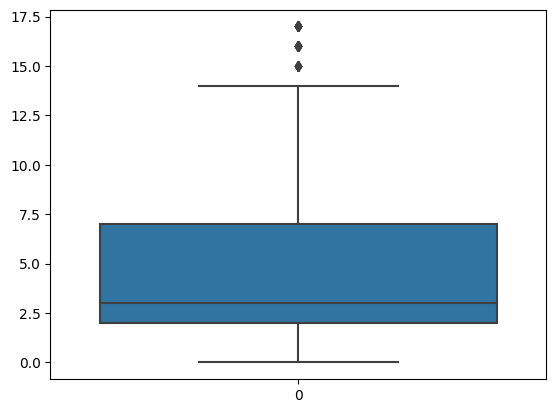

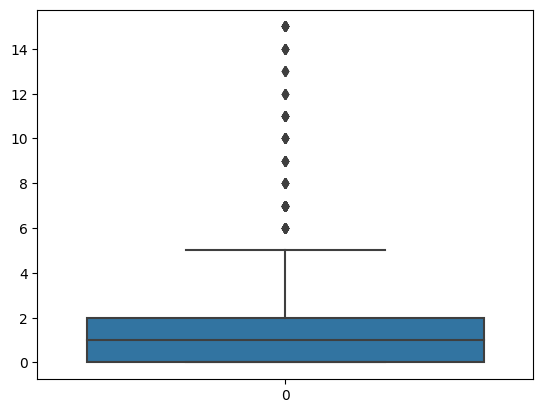

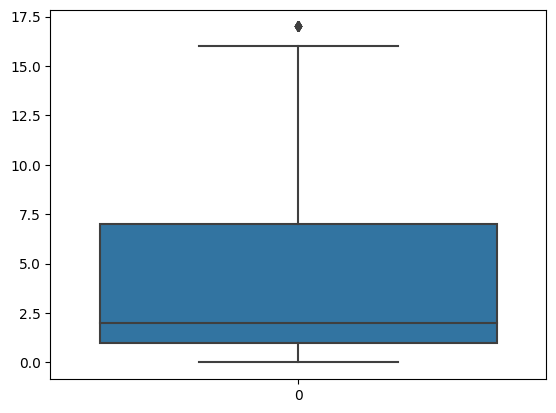

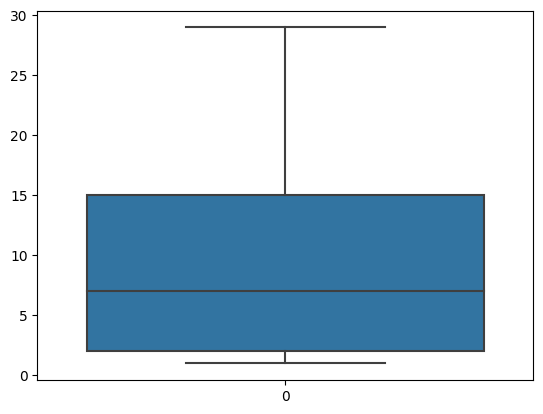

In [36]:
# cleaning the dataset from outliers
for i in df_numeric:
    sns.boxplot(df_numeric[i])
    plt.show()

In [37]:
#  we find that
# monthly billing,
# training times last year,
# years at company,
# year since lst promotion has outliers
# now we will remove them

In [38]:
# removing outlier from monthly billing
Q1 = df_numeric['MonthlyBilling'].quantile(0.25)
Q3 = df_numeric['MonthlyBilling'].quantile(0.75)

Q1,Q3
IQR=Q3-Q1
print('IQR is',IQR)

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)



IQR is 5919.25
low_limit is -5959.625
up_limit is 17717.375


In [39]:
df_numeric=df_numeric[(df_numeric['MonthlyBilling'] < up_lim) & (df_numeric['MonthlyBilling'] > low_lim)]

In [40]:
# removing outlier from TrainingTimesLastYear
Q1 = df_numeric['TrainingTimesLastYear'].quantile(0.25)
Q3 = df_numeric['TrainingTimesLastYear'].quantile(0.75)

Q1,Q3
IQR=Q3-Q1
print('IQR is',IQR)

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)



IQR is 1.0
low_limit is 0.5
up_limit is 4.5


In [41]:
df_numeric=df_numeric[(df_numeric['TrainingTimesLastYear'] < up_lim) & (df_numeric['TrainingTimesLastYear'] > low_lim)]

In [42]:
# removing outlier from years at company
Q1 = df_numeric['YearsAtCompany'].quantile(0.25)
Q3 = df_numeric['YearsAtCompany'].quantile(0.75)

Q1,Q3
IQR=Q3-Q1
print('IQR is',IQR)

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)



IQR is 6.0
low_limit is -6.0
up_limit is 18.0


In [43]:
df_numeric=df_numeric[(df_numeric['YearsAtCompany'] < up_lim) & (df_numeric['YearsAtCompany'] > low_lim)]

In [44]:
# removing outlier from years since last promotion
Q1 = df_numeric['YearsSinceLastPromotion'].quantile(0.25)
Q3 = df_numeric['YearsSinceLastPromotion'].quantile(0.75)

Q1,Q3
IQR=Q3-Q1
print('IQR is',IQR)

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

IQR is 2.0
low_limit is -3.0
up_limit is 5.0


In [45]:
df_numeric=df_numeric[(df_numeric['YearsSinceLastPromotion'] < up_lim) & (df_numeric['YearsSinceLastPromotion'] > low_lim)]


In [46]:
Q1 = df_numeric['YearsWithCurrentManager'].quantile(0.25)
Q3 = df_numeric['YearsWithCurrentManager'].quantile(0.75)

Q1,Q3
IQR=Q3-Q1
print('IQR is',IQR)

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

IQR is 3.0
low_limit is -3.5
up_limit is 8.5


In [47]:
df_numeric = df_numeric[(df_numeric['YearsWithCurrentManager'] < up_lim) & (df_numeric['YearsWithCurrentManager'] > low_lim)]
df_numeric.shape

(868, 29)

In [48]:
df_numeric=df_numeric.reset_index()
df_numeric.drop(['index'],axis=1,inplace=True)
df_numeric.drop(['Gender','Hours'],axis=1,inplace=True)
df_numeric.shape

(868, 27)

Splitting the dataset into train and test

In [49]:

from sklearn.model_selection import train_test_split


In [50]:
df_numeric.columns

Index(['EmployeId', 'Age', 'MaritalStatus', 'Turnover', 'Travelling',
       'Qualifications', 'EmployeSatisfaction', 'JobEngagement', 'JobLevel',
       'JobSatisfaction', 'DailyBilling', 'HourBilling', 'MonthlyBilling',
       'MonthlyRate', 'Work Experience', 'OverTime', 'PercentSalaryHike',
       'Last Rating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TrainingTimesLastYear', 'Work&Life', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrentManager', 'DistanceFromHome'],
      dtype='object')

In [51]:
x = df_numeric.drop(['Turnover'],axis=1)
y = df_numeric['Turnover']

In [52]:
xtrain , xtest , ytrain , ytest = train_test_split(x,y,test_size = 0.3, random_state = 42)

Trying three different ensemble models
1. Making a Random Forest Classifier Model


In [53]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50)
rf_model.fit(xtrain, ytrain)
RandomForestClassifier(n_estimators=50)
rf_model.score(xtest,ytest)

0.8352490421455939

Evaluation using Accuracy

In [54]:

from sklearn.metrics import accuracy_score
pred=rf_model.predict(xtest)
score = accuracy_score(ytest,pred)
score

0.8352490421455939

2. Making an Extra Tree Classifier Model


In [55]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier(n_estimators=50)
etc.fit(xtrain,ytrain)
ExtraTreesClassifier(n_estimators=50)
etc.score(xtest,ytest)


0.8352490421455939

Evaluation using Accuracy

In [56]:

pred=etc.predict(xtest)
score = accuracy_score(ytest,pred)
score

0.8352490421455939

3. Making a Gradient Boosting Classifer Model


In [57]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(xtrain,ytrain)


GradientBoostingClassifier()

In [58]:
GradientBoostingClassifier()
gbc.score(xtest,ytest)

0.8007662835249042

Evaluation using Accuracy

In [59]:

pred=gbc.predict(xtest)
score = accuracy_score(ytest,pred)
score

0.8007662835249042

Evaluation using Confusion Matrix

In [60]:
confusion_matrix(ytest,pred)


array([[200,  16],
       [ 36,   9]])

In [61]:
# confusion matrix metrics
matrix=classification_report(ytest,pred)
print(matrix)

              precision    recall  f1-score   support

           0       0.85      0.93      0.88       216
           1       0.36      0.20      0.26        45

    accuracy                           0.80       261
   macro avg       0.60      0.56      0.57       261
weighted avg       0.76      0.80      0.78       261



In [65]:
xtest

,EmployeId,Age,MaritalStatus,Travelling,Qualifications,EmployeSatisfaction,JobEngagement,JobLevel,JobSatisfaction,DailyBilling,...,Last Rating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,Work&Life,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,DistanceFromHome
394,1305,32,2,0,1,2,3,2,4,1411,...,4,2,0,3,3,1,0,0,0,10
66,537,40,0,2,1,1,3,2,2,689,...,4,3,1,3,3,13,9,4,4,1
495,137,47,1,2,3,4,3,4,3,1471,...,3,4,1,4,3,3,12,4,4,12
67,1435,35,1,2,2,1,4,1,3,1239,...,3,3,1,3,3,1,0,0,0,8
853,1059,24,0,2,1,3,1,1,3,877,...,3,4,1,4,2,3,2,0,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,1320,46,1,2,3,3,1,5,3,365,...,4,4,2,2,2,5,2,1,2,5
90,1721,33,1,1,1,3,3,2,4,815,...,3,4,2,3,3,1,0,0,0,2
814,2056,34,1,0,3,2,3,2,4,621,...,3,4,0,2,3,9,8,0,0,2
181,1720,49,0,2,3,2,1,2,3,688,...,3,4,1,2,3,5,2,1,2,15


In [75]:
# Assuming rf_model is your trained Random Forest model and xtest is your test data
employee_to_predict = xtest[xtest['EmployeId'] == 1305]  # Extract features for the employee


# Get probability predictions for the specific employee
probability_predictions = rf_model.predict_proba(employee_to_predict )

# Extract the probability of turnover
probability_of_turnover = probability_predictions[0][1]  # Probability of turnover is usually the second column in the output

# Set a threshold for considering it high probability (you can adjust this threshold based on your needs)
threshold = 0.5

# Display the predictions and probability
if probability_of_turnover >= threshold:
    print(f"This employee has a {probability_of_turnover * 100:.2f}% probability of turnover. This is considered high.")
else:
    print(f"This employee has a {probability_of_turnover * 100:.2f}% probability of turnover. This is considered low.")


This employee has a 18.00% probability of turnover. This is considered low.


In [79]:
import pandas as pd

# Assuming rf_model is your trained Random Forest model and xtest is your test data
# Extract features for all employees in xtest
features_all_employees = xtest

# Get probability predictions for all employees
probability_predictions_all_employees = rf_model.predict_proba(features_all_employees)

# Extract the probability of turnover for each employee
probabilities_of_turnover = probability_predictions_all_employees[:, 1]  # Probability of turnover is usually the second column in the output

# Create a DataFrame to store EmployeeId and corresponding probabilities
employee_probabilities_df = pd.DataFrame({'EmployeeId': xtest['EmployeId'], 'Probability_of_Turnover': probabilities_of_turnover})

# Sort the DataFrame by 'Probability_of_Turnover' in descending order
sorted_employee_probabilities_df = employee_probabilities_df.sort_values(by='Probability_of_Turnover', ascending=False)

# Display the sorted DataFrame
print(sorted_employee_probabilities_df.head())


     EmployeeId  Probability_of_Turnover
346        1550                     0.54
810        1974                     0.52
412        1817                     0.50
477          94                     0.50
362        1038                     0.48


In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming sorted_employee_probabilities_df is already sorted DataFrame
threshold = 0.5

# Create a new column indicating whether the probability is over 50%
sorted_employee_probabilities_df['High_Probability'] = sorted_employee_probabilities_df['Probability_of_Turnover'] >= threshold

# Define a function for styling rows
def color_high_probability(val):
    color = 'red' if val else 'skyblue'
    return f'background-color: {color}'

# Apply the styling function to the DataFrame
styled_df = sorted_employee_probabilities_df.style.applymap(color_high_probability, subset=['High_Probability'])

# Display the styled DataFrame
display(styled_df)




,EmployeeId,Probability_of_Turnover,High_Probability
346,1550,0.540000,True
810,1974,0.520000,True
412,1817,0.500000,True
477,94,0.500000,True
362,1038,0.480000,False
758,1609,0.480000,False
440,472,0.480000,False
294,1333,0.480000,False
465,1883,0.460000,False
424,1013,0.460000,False


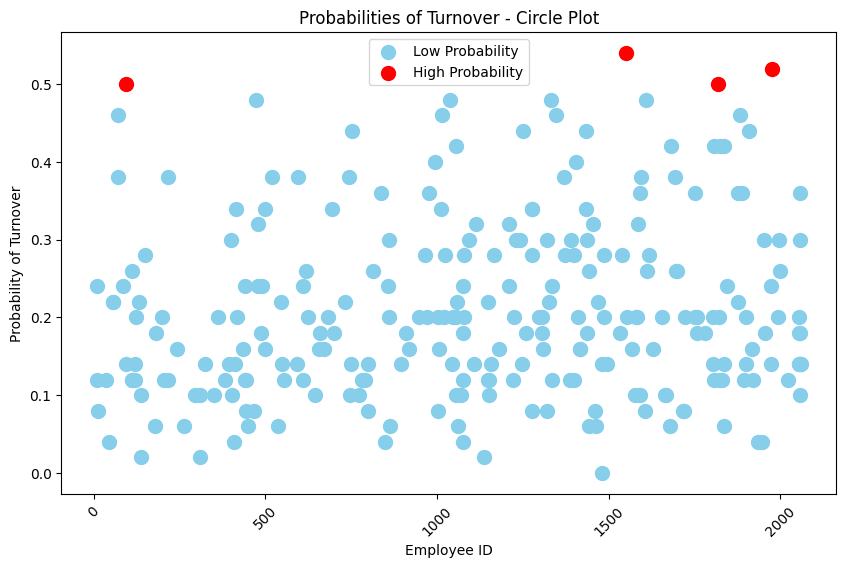

In [93]:
import matplotlib.pyplot as plt

# Assuming sorted_employee_probabilities_df is already sorted DataFrame
threshold = 0.5

# Create a new column indicating whether the probability is over 50%
sorted_employee_probabilities_df['High_Probability'] = sorted_employee_probabilities_df['Probability_of_Turnover'] >= threshold

# Plot a scatter plot with circles representing probabilities
plt.figure(figsize=(10, 6))

# Scatter plot for employees with low probability
plt.scatter(sorted_employee_probabilities_df.loc[~sorted_employee_probabilities_df['High_Probability'], 'EmployeeId'],
            sorted_employee_probabilities_df.loc[~sorted_employee_probabilities_df['High_Probability'], 'Probability_of_Turnover'],
            s=100, color='skyblue', label='Low Probability')

# Scatter plot for employees with high probability
plt.scatter(sorted_employee_probabilities_df.loc[sorted_employee_probabilities_df['High_Probability'], 'EmployeeId'],
            sorted_employee_probabilities_df.loc[sorted_employee_probabilities_df['High_Probability'], 'Probability_of_Turnover'],
            s=100, color='red', label='High Probability')

# Set axis labels and title
plt.xlabel('Employee ID')
plt.ylabel('Probability of Turnover')
plt.title('Probabilities of Turnover - Circle Plot')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.show()
